In [2]:
import pygeoda
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [35]:
gdf = gpd.read_file("guerry/Guerry.shp")
guerry = pygeoda.open(gdf)

<AxesSubplot:>

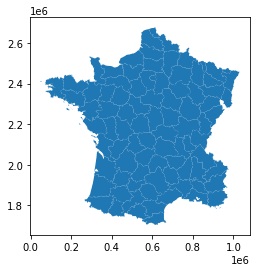

In [36]:
gdf.plot()

In [37]:
queen_w = pygeoda.queen_weights(guerry)
crm_prp = guerry['Crm_prp']

In [38]:
lm = pygeoda.local_moran(queen_w, crm_prp)

In [39]:
# values of local Moran
lms = lm.lisa_values()

In [40]:
# pseudo-p values of significance of local Moran computation
pvals = lm.lisa_pvalues()
print(pvals[:20])

[0.414, 0.123, 0.001, 0.474, 0.452, 0.087, 0.243, 0.326, 0.299, 0.303, 0.237, 0.461, 0.248, 0.015, 0.178, 0.166, 0.124, 0.003, 0.456, 0.346]


In [41]:
# To get the cluster indicators of local Moran computation
cats = lm.lisa_clusters()
print(cats[:20])

(0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0)


In [42]:
lbls = lm.lisa_labels()
lbls

('Not significant',
 'High-High',
 'Low-Low',
 'Low-High',
 'High-Low',
 'Undefined',
 'Isolated')

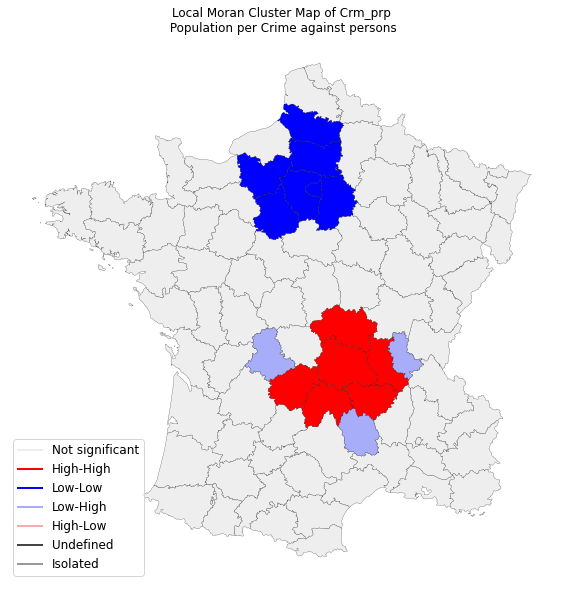

In [43]:
fig, ax = plt.subplots(figsize = (10,10))
lisa_colors = lm.lisa_colors()
lisa_labels = lm.lisa_labels()

# attach LISA cluster indicators to geodataframe
gdf['LISA'] = lm.lisa_clusters()

for ctype, data in gdf.groupby('LISA'):
    color = lisa_colors[ctype]
    lbl = lisa_labels[ctype]
    data.plot(color = color,
        ax = ax,
        label = lbl,
        edgecolor = 'black',
        linewidth = 0.2)

# Place legend in the lower right hand corner of the plot
lisa_legend = [matplotlib.lines.Line2D([0], [0], color=color, lw=2) for color in lisa_colors]
ax.legend(lisa_legend, lisa_labels,loc='lower left', fontsize=12, frameon=True)
ax.set(title='Local Moran Cluster Map of Crm_prp\n Population per Crime against persons')
ax.set_axis_off()

In [13]:
illinois_shp = gpd.read_file('raw_il_census_tracts_shapefile/tl_2019_17_tract.shp')

exposure_df = pd.read_csv("Streetlight_Data/clean_data/dptotal/dptotal_exposure_df.csv")[['FIPS','exposure1','exposure2','exposure3','exposure4']]
ct_info_cases = pd.read_csv('Statistical_Analysis/data/ct_info_cases_data.csv')

exposure_df['GEOID']='1'
for i in range(exposure_df.shape[0]):    
    exposure_df['GEOID'][i] = exposure_df['FIPS'][i]
exposure_df = exposure_df[['GEOID','exposure1','exposure2','exposure3','exposure4']]

exposure_df = pd.merge(ct_info_cases, exposure_df, how='left', on="GEOID")  

for i in range(exposure_df.shape[0]):    
    exposure_df['GEOID'][i] = str(exposure_df['GEOID'][i])
# exposure_df = exposure_df[['GEOID','exposure1','exposure2','exposure3','exposure4']]

    
# exposure_list = ["exposure1_x", "exposure2_x", "exposure3_x", "exposure4_x"]
# for exposure in exposure_list:
#     lower = np.quantile(exposure_df[exposure],0.05)
#     upper = np.quantile(exposure_df[exposure],0.95)
#     exposure_df[exposure_df[exposure] < lower] = 0   
#     exposure_df[exposure_df[exposure] > upper] = upper


illinois_shp = pd.merge(illinois_shp, exposure_df, how='left', on="GEOID")

# geo_illinois_shp = pygeoda.open(illinois_shp)

/var/folders/mj/yy94wkqj1x73mgydrb1dzrqm0000gn/T/ipykernel_64313/3979646506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exposure_df['GEOID'][i] = exposure_df['FIPS'][i]
/var/folders/mj/yy94wkqj1x73mgydrb1dzrqm0000gn/T/ipykernel_64313/3979646506.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exposure_df['GEOID'][i] = str(exposure_df['GEOID'][i])


In [14]:
# illinois_shp = gpd.read_file('raw_il_census_tracts_shapefile/tl_2019_17_tract.shp')
geo_illinois_shp = pygeoda.open(illinois_shp)

In [15]:
exposure_df.columns

Index(['Unnamed: 0', 'X.x', 'GEOID', 'countyFIPS', 'POPULATION', 'POP_DENSITY',
       'Shape_Area', 'NUM_WORKERS', 'EMPLOYMENT_DENSITY', 'No..Hospitals',
       'No..Populated.Places', 'Total.Points.of.Interest', 'exposure_entropy',
       'ALAND', 'cases1', 'cases2', 'cases3', 'cases4', 'income', 'X.y',
       'exposure1_x', 'exposure2_x', 'exposure3_x', 'exposure4_x',
       'county_pop', 'estimate_cases1', 'estimate_cases2', 'estimate_cases3',
       'estimate_cases4', 'estimate_cases1_density', 'estimate_cases2_density',
       'estimate_cases3_density', 'estimate_cases4_density',
       'pop_density_class', 'income_class', 'change12exposure',
       'change23exposure', 'change34exposure', 'change12casedensity',
       'change23casedensity', 'change34casedensity', 'exposure1_y',
       'exposure2_y', 'exposure3_y', 'exposure4_y'],
      dtype='object')

In [16]:
queen_w = pygeoda.queen_weights(geo_illinois_shp)
lm = pygeoda.local_moran(queen_w, illinois_shp['exposure2_x'])

In [17]:
# To get the cluster indicators of local Moran computation
cats = lm.lisa_clusters()
print(cats[1:20])

(0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0)


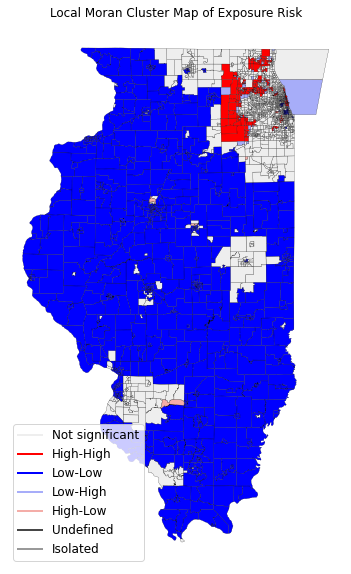

In [20]:
fig, ax = plt.subplots(figsize = (10,10))
lisa_colors = lm.lisa_colors()
lisa_labels = lm.lisa_labels()

# attach LISA cluster indicators to geodataframe
illinois_shp['LISA'] = lm.lisa_clusters()

for ctype, data in illinois_shp.groupby('LISA'):
    color = lisa_colors[ctype]
    lbl = lisa_labels[ctype]
    data.plot(color = color,
        ax = ax,
        label = lbl,
        edgecolor = 'black',
        linewidth = 0.2)

# Place legend in the lower right hand corner of the plot
lisa_legend = [matplotlib.lines.Line2D([0], [0], color=color, lw=2) for color in lisa_colors]
ax.legend(lisa_legend, lisa_labels,loc='lower left', fontsize=12, frameon=True)
ax.set(title='Local Moran Cluster Map of Exposure Risk')
ax.set_axis_off()

In [21]:
lisa_labels

('Not significant',
 'High-High',
 'Low-Low',
 'Low-High',
 'High-Low',
 'Undefined',
 'Isolated')

In [12]:
lisa_colors

('#eeeeee', '#FF0000', '#0000FF', '#a7adf9', '#f4ada8', '#464646', '#999999')